# **Tabular Fake News Detection**

## **Background**

We are in an election year and news accuracy will be an increaing problem. The proliferation of online content and social media platforms has given rise to  the spread of fake news. Fake news refers to misleading or fabricated information presented as genuine news, often with the intention to deceive or manipulate public opinion. In many cases there are nation states involved. Detecting fake news has become a significant challenge, as it requires distinguishing between credible information and deceptive content. 

## **Problem Description**

Our charge is to develop several Machine Learning models capable of detecting fake news articles, with the end goal of developing the best possible model.

The data that we will use to do this from a tabular dataset containing metadata-level information about each article such as the word count, average word length, number of sentences and number of unique words. This dataset will contain both real and fake news articles, and the Machine Learning model's task is to correctly segregate the fake news articles from real.

You need to augment the EDA in this notebook - this would include better labels on the charts as well as addtional EDA functionality. You also need to develop 4 additional models.  There should be a summary table at the end of the notebook along with some graphical presentation of results.

___

## **Reading the Dataset**

In [1]:
# Importing the required libraries

# Library for data manipulation and analysis
import pandas as pd

# Library for statistical data visualization
import seaborn as sns
# Library for creating visualizations
import matplotlib.pyplot as plt

# Importing the RandomForestClassifier algorithm
from sklearn.ensemble import RandomForestClassifier

# Library for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

 # Library for evaluating model accuracy
from sklearn.metrics import accuracy_score , f1_score, confusion_matrix

In [2]:
#Loading the dataset
df = pd.read_csv("Tabular_data_1.3.csv")

In [3]:
#Let us see the first 10 rows of the dataset
df.head(10)

,ID,Word_Count,Number_of_Sentence,Unique_Words,Average_Word_Length,Label
0,1606,10,4,24,6.176750,1
1,3718,10,8,25,5.826770,1
2,2634,10,7,18,4.619040,1
3,5560,10,6,18,4.961424,1
4,7494,10,4,21,4.114324,1
5,3159,39,5,16,4.582874,1
6,7232,11,4,21,5.756046,1
7,7509,11,5,21,4.502690,1
8,1509,11,6,24,3.943672,1
9,1657,11,8,19,5.419068,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4500 non-null   int64  
 1   Word_Count           4500 non-null   int64  
 2   Number_of_Sentence   4500 non-null   int64  
 3   Unique_Words         4500 non-null   int64  
 4   Average_Word_Length  4500 non-null   float64
 5   Label                4500 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 211.1 KB


- Most columns are of the int64 data type, which is typically used for integer values. However, the "Average_Word_Length" column is of the float64 data type, suggesting that it contains decimal values.

- The "Non-Null Count" indicates that all 6 columns have 4500 non-null entries, meaning there are no missing values.

## **Summary Statistics**

In [5]:
df.describe()

,ID,Word_Count,Number_of_Sentence,Unique_Words,Average_Word_Length,Label
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,5469.140000,53.934000,8.934667,24.943333,4.968105,0.329556
std,2599.193059,24.872743,3.407847,11.540708,1.152394,0.470104
min,1002.000000,10.000000,4.000000,5.000000,3.000385,0.000000
25%,3228.750000,35.000000,6.000000,17.000000,3.980553,0.000000
50%,5449.500000,52.000000,9.000000,22.000000,4.906200,0.000000
75%,7706.750000,75.000000,12.000000,33.000000,5.996111,1.000000
max,9999.000000,100.000000,15.000000,50.000000,6.999799,1.000000


- **The mean of "Word_Count" is 53.934, and "Number_of_sentence" is 8.93.**

- The median of "Unique_Words" is 22, indicating that half of the data points have unique word counts below this value.

- The maximum Number_of_sentence is 15.

- The maximum count of unique words in a sentence is 50. This means that there is a sentence with a vocabulary of 50 distinct words.



## Preprocessing
### Steps Taken
* Did not check missing values (see *Reading the Dataset*)
* Checked Duplicate Data (dropped ID)
* Checked Inconsistant Data 
* Checked Outliers

### Duplicate Data?

In sections prior, we know that one feature in the dataset is 100% unique. With this being said, the ID column was found to not be 100% unique. A further investigation is needed. 

In [6]:
# Calculate the count of occurrences for each unique value in the 'ID' column
value_counts = df['ID'].value_counts()

# Filter the DataFrame to include rows where the count is greater than 1
filtered_df = df[df['ID'].map(value_counts) > 1]
filtered_df.count().head(1)

ID    1763
dtype: int64

Some news sources have multiple apperances in this data set.

In [7]:
filtered_df["Label"].value_counts()

Label
0    1152
1     611
Name: count, dtype: int64

Looking above, it looks like some news stories can be both true and false from a source.

In [8]:
df.drop("ID", axis=1, inplace=True)

<div class="alert alert-block alert-info">
<b>Dropped ID:</b> From the information gathered, this feature would likley not be a good predictor when deciding if a news story is fake or not.
</div>

### Inconsistent Data

In [9]:
""" Inconsistency Check. """

def visualConsistent(dataFrame):
    """ Generator of dataframe column unique. """
    columns = dataFrame.columns.tolist()
    for col in columns:
        yield col, dataFrame[col].unique()
        
for title, content in visualConsistent(df):
    print(f"{title}\n{content}\n")

Word_Count
[ 10  39  11  69  12  85  13  14  94  27  28  15  42  38  20  32  36  62
  24  16  55  89  60  66  17  57  18  58  19  59  48  51  44  21  34  56
  68  45  78  72  52  53  86  71  43  97  22  23  25  26  40  41  46  29
  47  49  50  30  54  31  33  35  64  67  37  70  77  82  87  92  98  63
  80  99  83  75  93  96  74  61  73  76  90  91  88  65 100  79  95  84
  81]

Number_of_Sentence
[ 4  8  7  6  5  9 11 14 15 12 10 13]

Unique_Words
[24 25 18 21 16 19 15 22 17 23 20 50 42 35  5 32 40 41 45 13 10 14 37 39
 26  6 28 47  8 11  9  7 48 38 27 43 31 46 12 36 30 49 29 44 34 33]

Average_Word_Length
[6.17674972 5.82676996 4.61903952 ... 3.37682349 5.33139342 4.31275123]

Label
[1 0]



No feature contains inconsitant data. We already knew this from the section *Reading the Dataset* but it never hurt to check.

### Outliers

In [10]:
def checkOutliers(data_frame):
    columns = data_frame.columns.tolist()
    for col in columns:
        try:
            # Create a box plot
            sns.boxplot(data=data_frame, x=col)
            plt.xlabel(col)
            plt.title(f"Box Plot: {col} (with Outliers)")
            plt.show()

            # Create a histogram
            sns.histplot(data=data_frame, x=col, kde=True, color='skyblue')
            plt.xlabel(col)
            plt.title(f"Histogram: {col}")
            plt.show()
            
            # Seperation Line 
            print("`" * 100)
            
        except Exception as e:
            print(f"\n[{col}] not displayed.\n")
            
            print("`" * 100)

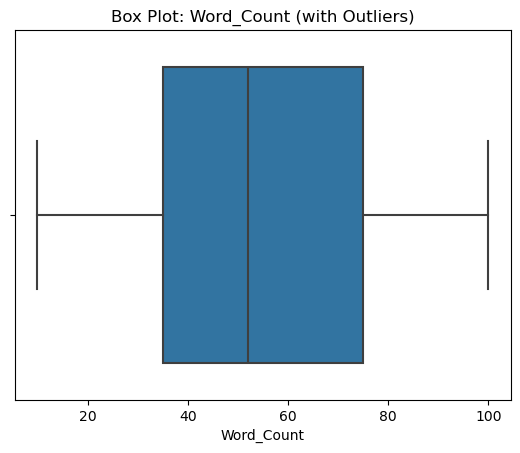

C:\Users\chadp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


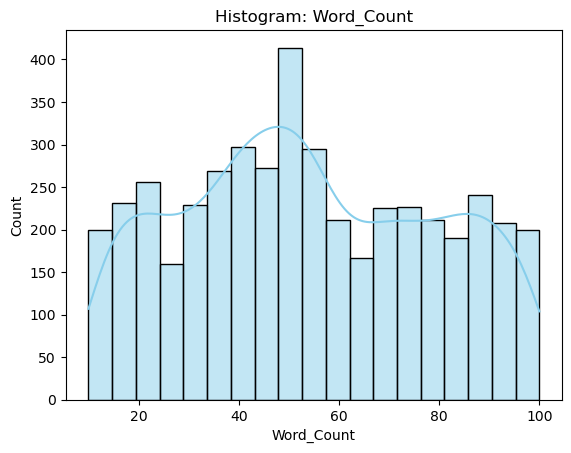

````````````````````````````````````````````````````````````````````````````````````````````````````


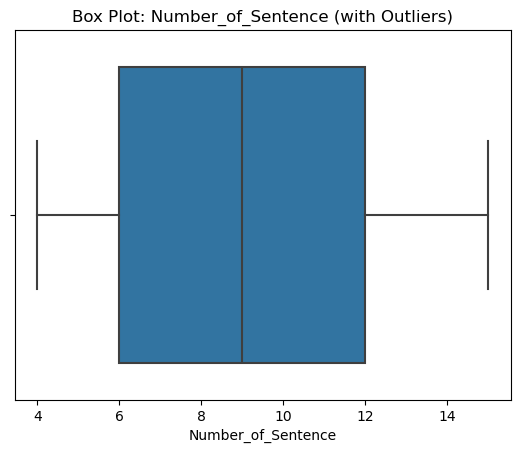

C:\Users\chadp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


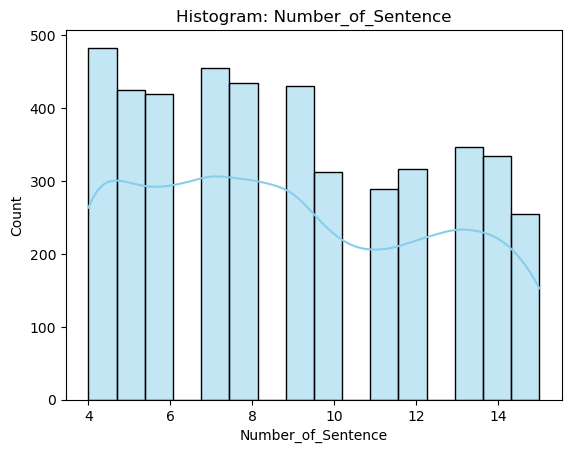

````````````````````````````````````````````````````````````````````````````````````````````````````


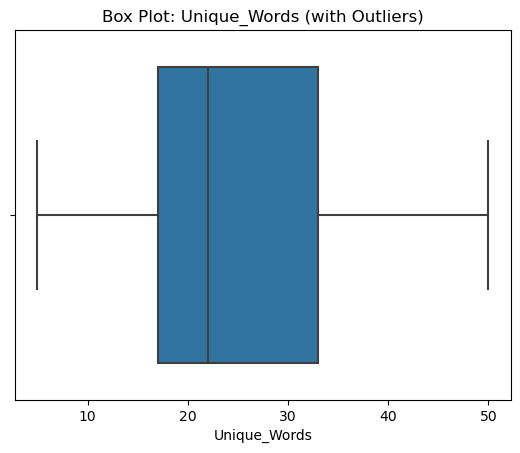

C:\Users\chadp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


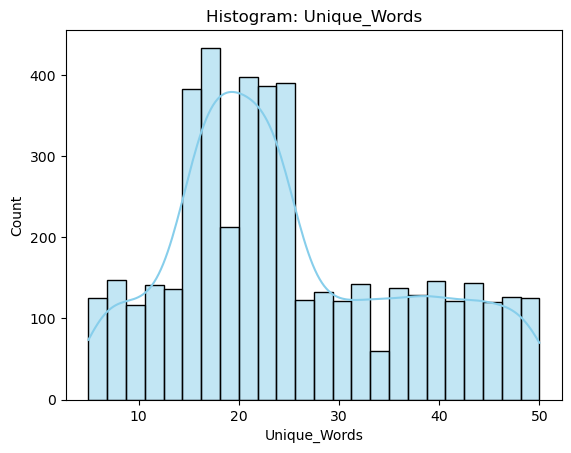

````````````````````````````````````````````````````````````````````````````````````````````````````


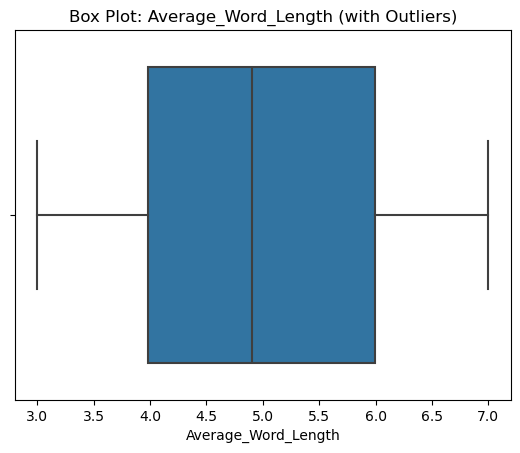

C:\Users\chadp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


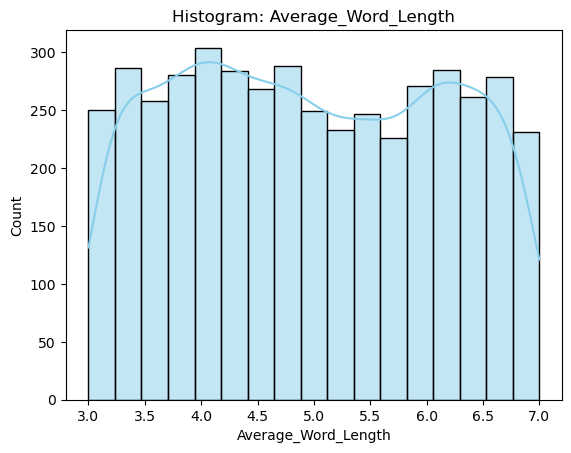

````````````````````````````````````````````````````````````````````````````````````````````````````


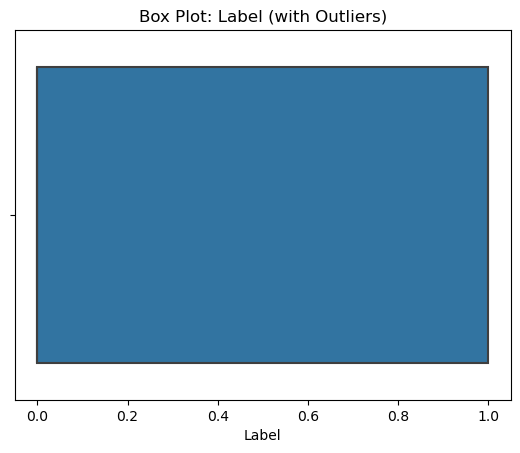

C:\Users\chadp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


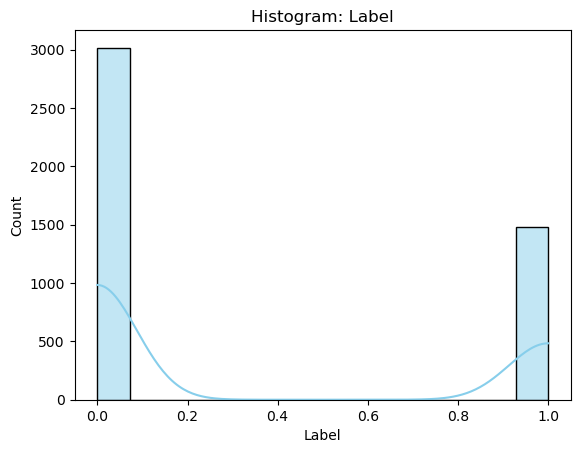

````````````````````````````````````````````````````````````````````````````````````````````````````


In [11]:
checkOutliers(df)

All the columns were displayed and it looks like none had any outliers. To say that the distribution of some variables was normal is a stretch. 

## **Exploratory Data Analysis (EDA)**

### Steps Taken
* Univariate Analysis of each column *Some done in Outliers section*
* Multivariate Analysis of columns with label

___

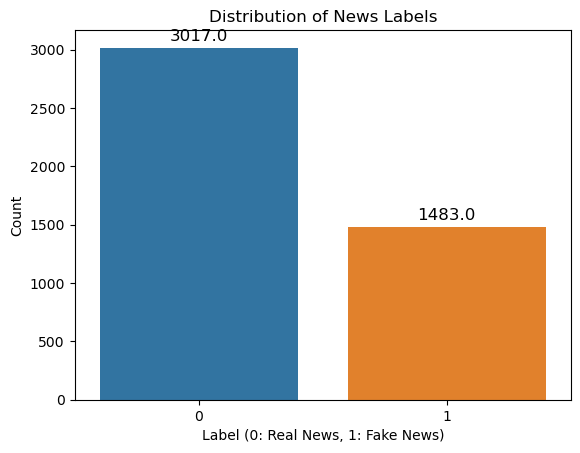

In [12]:
# Plotting the distribution of labels
ax = sns.countplot(x='Label', data=df)

# Adding labels and title
plt.xlabel('Label (0: Real News, 1: Fake News)')
plt.ylabel('Count')
plt.title('Distribution of News Labels')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

**The dataset contains 3017 instances of Real News (Label 0) and 1483 instances of Fake News (Label 1).** This indicates a **class imbalance**, where the number of real news instances is significantly larger than the number of fake news instances.

This could potentially impact the performance of a Machine Learning model, as it might be biased towards classifying news as real due to the larger number of instances.

<div class="alert alert-block alert-info">
<b>To Solve Imbalance:</b> Used the stratification parameter when spliting the dataset.
    
"Stratified sampling ensures that the training data used for each decision tree in the Random Forest maintains the same class distribution as the original dataset." Source: Microsoft Copilot.
</div>

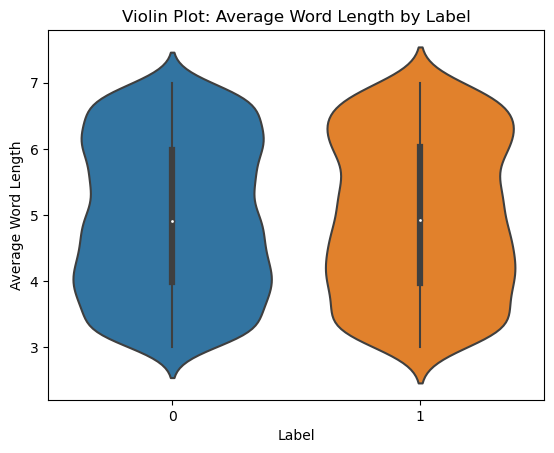

In [13]:
# Create a violin plot
sns.violinplot(x="Label", y="Average_Word_Length", data=df)
plt.title("Violin Plot: Average Word Length by Label")
plt.xlabel("Label")
plt.ylabel("Average Word Length")
plt.show()

- The width of the plot represents the density of data at different average word lengths. A wider portion indicates higher density, while narrower portions indicate lower density.

- The violin plot shows variations in density within certain ranges of average word lengths. These variations might indicate specific patterns or trends in writing style for both real and fake news articles

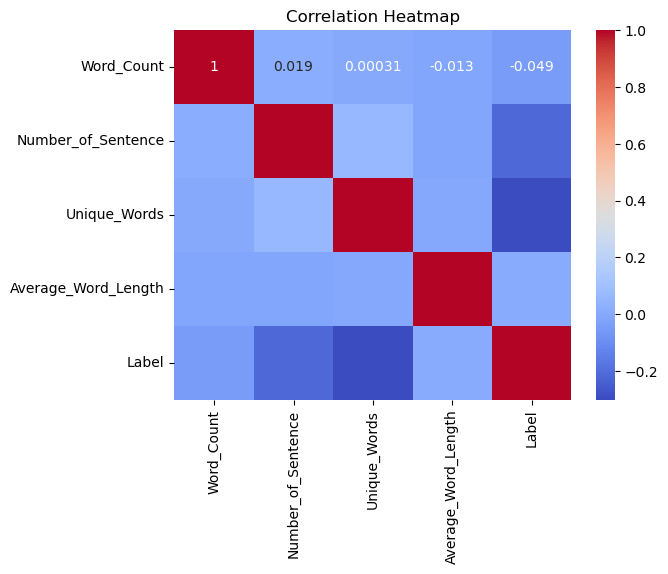

In [14]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**Insights from the Correlation Heatmap**

- The correlation between "Word_Count" and the "Label" is approximately -0.0489. This indicates a very weak negative correlation between the word count of an article and whether it is real news (Label 0) or fake news (Label 1).

- **The correlation between "Number_of_Sentence" and the "Label" is approximately -0.21.** This moderate negative correlation suggests that there's a more noticeable relationship between the number of sentences in an article and whether it's a fake news article or not.

- **The correlation between "Unique_Words" and the "Label" is approximately -0.3. This moderate negative correlation suggests that fake news articles tend to use fewer unique words compared to real news articles. This could be an interesting feature for classification, as it indicates differences in vocabulary richness between the two categories.**

- Most of the correlations between the other pairs of variables are close to zero or very low. This indicates a lack of strong linear relationships between these pairs of variables.

C:\Users\chadp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Number_of_Sentence', ylabel='Density'>

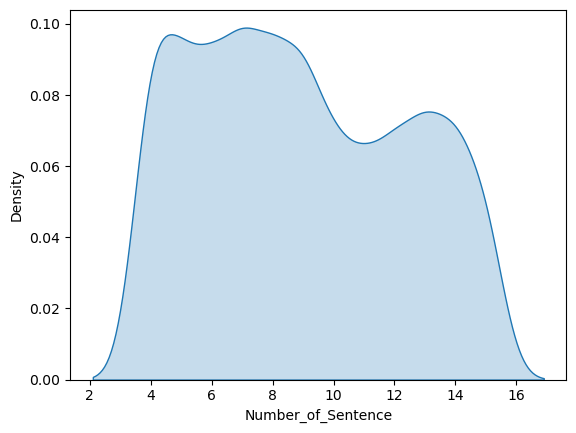

In [15]:
sns.kdeplot(data=df, x="Number_of_Sentence", fill=True)

> The number of sentences for all records seems to hover around 4 to 8. 

C:\Users\chadp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Unique_Words', ylabel='Density'>

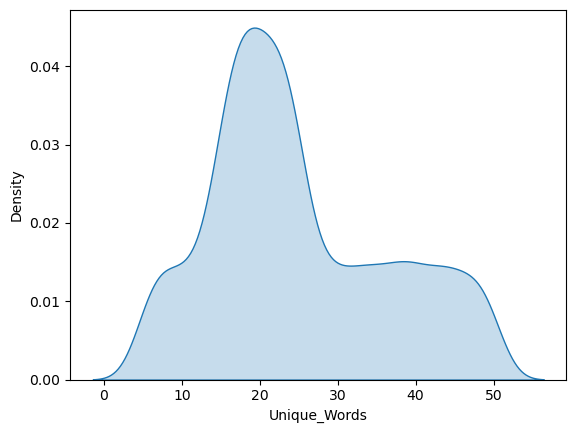

In [16]:
sns.kdeplot(data=df, x="Unique_Words", fill=True)

> For every record, the number of unqiue words is most likley to be around 20. There is minimal difference between 10 and 50.

C:\Users\chadp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Word_Count', ylabel='Count'>

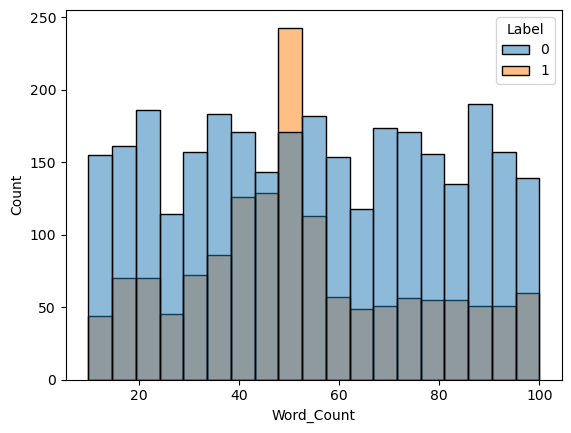

In [17]:
sns.histplot(data=df, x="Word_Count", hue="Label")

There appears to be a word count around 50 that has more fake news articles than other measures.

## **Model Building**

#### Steps Taken
* Defined methods for later use
* Split training and testing 
* Built 5 models

In [18]:
""" Methods for Reporting and Tracking. """

#  recall, precision

col = ["Model Name", "Accuracy", "F1"]

modelStats = pd.DataFrame(data = None, columns = col)

def addToReport(listOfData:list, dataFrame) -> None:
    """
    Append data to end of data frame.
    
    List must be same length as DataFrame
    """
    dataFrame.loc[len(dataFrame)] = listOfData
    

In [19]:
""" Metrics for Random Forest Model(s). """

from sklearn.metrics import (accuracy_score, 
                             f1_score, 
                             recall_score, 
                             precision_score)


def modelMetrics(modelName, test, prediction) -> dict:
    accuracy = accuracy_score(test, prediction)
    recall = recall_score(test, prediction, average="weighted")
    f1 = f1_score(test, prediction)
    precision = precision_score(test, prediction)
    return ({"Model Name": modelName,
             "Test Accuracy":accuracy, 
             "Recall": recall,
             "F1": f1, 
             "Precision": precision})

### Split

In [20]:
# Separate features (X) and target variable (y)
X = df.drop(['Label'], axis=1)
y = df['Label']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42, stratify = y)

In [21]:
split = lambda testSize : f"[At a {testSize}% split] Train: {len(X_train)} | Test: {len(X_test)}"

print(split(30))

[At a 30% split] Train: 3150 | Test: 1350


### Model 1

In [22]:
""" Random Forest Model. """

model_rf1 = RandomForestClassifier(n_estimators=150,
                                  max_depth=5,
                                  random_state=42
                                  )
model_rf1.fit(X_train, y_train)

y_pred = model_rf1.predict(X_test) # Test Predictions
y_train_pred = model_rf1.predict(X_train) # Train Predictions

In [23]:
# displaying and storing metrics of model one
modelOneMetrics = modelMetrics("RandForest 4 Features", y_test, y_pred)
pd.DataFrame([modelOneMetrics])

,Model Name,Test Accuracy,Recall,F1,Precision
0,RandForest 4 Features,0.906667,0.906667,0.875984,0.779335


In [24]:
print(f" Train Accuracy: {accuracy_score(y_train, y_train_pred): .04}")

 Train Accuracy:  0.9022


##### Interpretations

**Accuracy:** The accuracy is the proportion of correct predictions made by the model out of all predictions. In this case, it is out of only the testing data. So the model was correct in its predictions about 90.67% of the time. 

**Recall:** The model correctly classified 90.67% of the true positives (is fake news) in the testing dataset.

**Precision:** When the model predicted that the news story was fake (positive), it was right about 77.93% of the time. 

**F1:** The F1 is the "harmonic mean" of precision and recall. A score of about 87.6% shows "a good balance between precision and recall. 

The training accuracy and testing accuracy are almost identical. This means that the model is well generalized.



                            Source of Definitions: Microsoft Copilot

<Axes: title={'center': 'RandomForestClassifier(max_depth=5, n_estimators=150, random_state=42)'}>

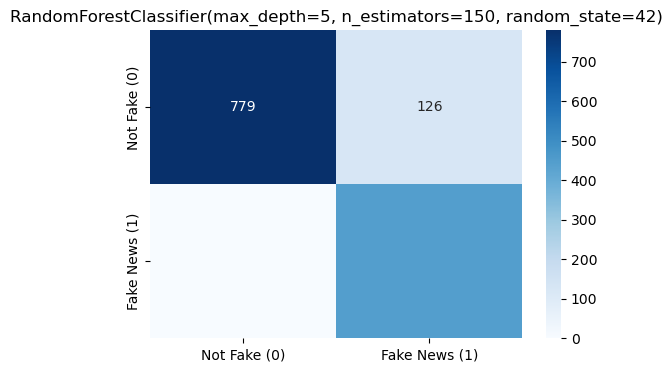

In [25]:
""" Confusion Matrix for Model. """

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = ['Not Fake (0)', 'Fake News (1)']

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
plt.title(str(model_rf1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

##### Interpretation

This model is better at avoiding false negatives (Not Fake) than it is false positives (Fake News).

#### Feature Importance

<function matplotlib.pyplot.show(close=None, block=None)>

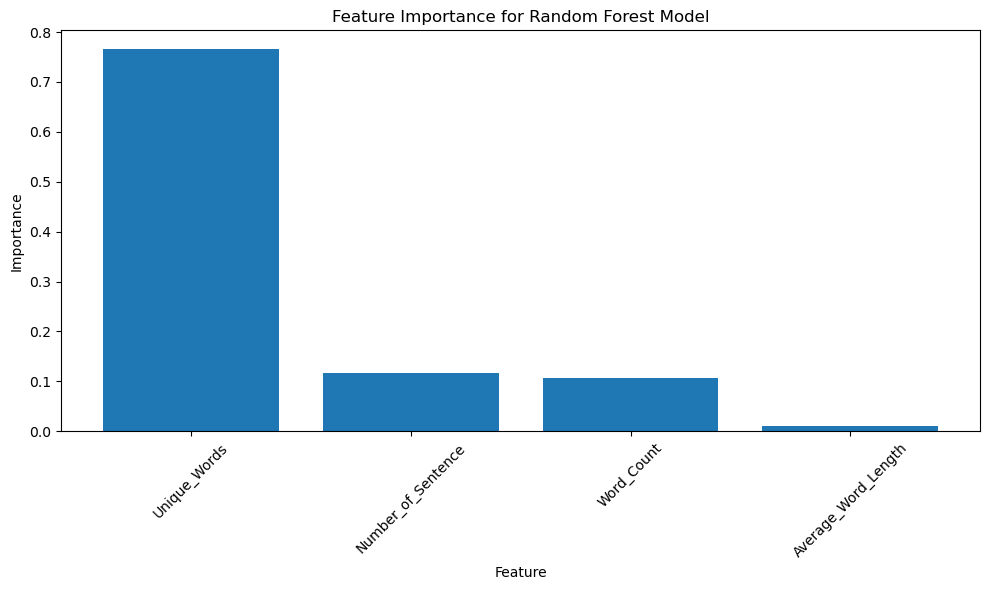

In [26]:
""" Plotting Feature Importance. """

import numpy as np

# Step 1 - Extracting 

feature_importance = model_rf1.feature_importances_ # values
feature_names = model_rf1.feature_names_in_ # column names
# sorted in desceding order 
sorted_indices = np.argsort(feature_importance)[::-1] 

# Step 2 - Plotting

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_indices])
plt.xticks(range(len(feature_importance)), np.array(feature_names)[sorted_indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance for Random Forest Model")
plt.tight_layout()
plt.show

For this Random Forest Model, it Unique_Words is the most important feature. Average_Word_Length has very little importance. 

### Model 2
Since the feature Average_Word_Length had very little importance, why not attempt a model that excludes this feature.

In [27]:
X = df.drop(['Label', "Average_Word_Length"], axis=1)
y = df['Label']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42, stratify = y)

In [28]:
""" Random Forest Model 2. """

model_rf2 = RandomForestClassifier(n_estimators=150,
                                  max_depth=5,
                                  random_state=42
                                  )
model_rf2.fit(X_train, y_train)

y_pred = model_rf2.predict(X_test) # Test Predictions
y_train_pred = model_rf2.predict(X_train) # Train Predictions

In [29]:
# displaying and storing metrics of model two
modelTwoMetrics = modelMetrics("RandForest 3 Features", y_test, y_pred)
pd.DataFrame([modelOneMetrics, modelTwoMetrics])

,Model Name,Test Accuracy,Recall,F1,Precision
0,RandForest 4 Features,0.906667,0.906667,0.875984,0.779335
1,RandForest 3 Features,0.907407,0.907407,0.876847,0.780702


In [30]:
print(f" Train Accuracy: {accuracy_score(y_train, y_train_pred): .04}")

 Train Accuracy:  0.9041


Removing the feature with the least importance improved all metrics. The training accuracy and testing accuracy also indicate that the model still has very good generalization. Lets remove another feature with the least amount of importance and see what happens.

<Axes: title={'center': 'RandomForestClassifier(max_depth=5, n_estimators=150, random_state=42)'}>

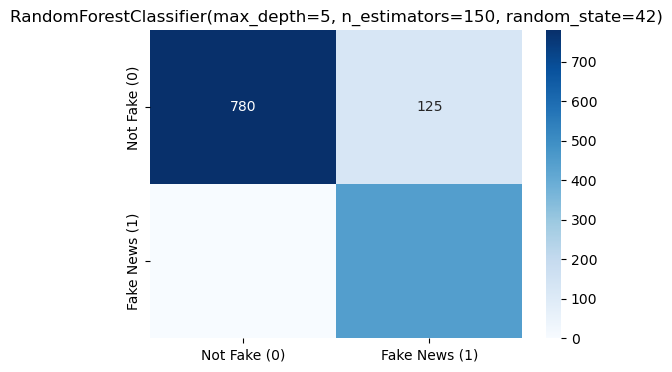

In [31]:
""" Confusion Matrix for Model. """
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = ['Not Fake (0)', 'Fake News (1)']

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
plt.title(str(model_rf2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

Checking the confusion matrix, the model with three features actually had one more true negative than its counterpart. 

### Model 3

In [32]:
X = df.drop(['Label', "Average_Word_Length", "Word_Count"], axis=1)
y = df['Label']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42, stratify = y)

In [33]:
""" Random Forest Model 3. """

model_rf3 = RandomForestClassifier(n_estimators=150,
                                  max_depth=5,
                                  random_state=42
                                  )
model_rf3.fit(X_train, y_train)

y_pred = model_rf3.predict(X_test) # Test Predictions
y_train_pred = model_rf3.predict(X_train) # Train Predictions

In [34]:
# displaying and storing metrics of model two
modelThreeMetrics = modelMetrics("RandForest 2 Features", y_test, y_pred)
pd.DataFrame([modelOneMetrics, modelTwoMetrics, modelThreeMetrics])

,Model Name,Test Accuracy,Recall,F1,Precision
0,RandForest 4 Features,0.906667,0.906667,0.875984,0.779335
1,RandForest 3 Features,0.907407,0.907407,0.876847,0.780702
2,RandForest 2 Features,0.860741,0.860741,0.822976,0.708266


In [35]:
print(f" Train Accuracy: {accuracy_score(y_train, y_train_pred): .04}")

 Train Accuracy:  0.8606


3 features is the sweetspot. Two features reduced all metrics significantly. There is no reason to check a confusion matrix for this obviously worse model. 

### Model 4

Since 3 features is now assumed to be the optimal number, there is no harm in tunning the hyperparemeters in attempts to achieve even higher scores. 

In [36]:
X = df.drop(['Label', "Average_Word_Length"], axis=1)
y = df['Label']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42, stratify = y)

In [37]:
# function for graphing f1 score vs n_estimators for the model

def plot_estimators_vs_accuracy(X_train, y_train, X_test, y_test, start, end):
    """ n_estimator tuned for best F1 score. """
    estimators = list()
    f1_scores = list()

    # Iterate over a range of n_estimators
    for n in range(start, end+1):
        # Train the model
        model = RandomForestClassifier(n_estimators=n, max_depth=10, random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate F1 score
        f1 = f1_score(y_test, y_pred)

        # Append results to lists
        estimators.append(n)
        f1_scores.append(f1)
        
    # Find the max F1 score and its corresponding n_estimators
    max_f1 = max(f1_scores)
    max_f1_index = f1_scores.index(max_f1)
    max_n_estimators = estimators[max_f1_index]
    
    

    # Plot results
    plt.plot(estimators, f1_scores)
    plt.xlabel('Number of Estimators')
    plt.ylabel('F1 Score')
    plt.title('F1 Score vs. Number of Estimators')
    plt.show()

    print(f"n_estimators for max f1 = {max_n_estimators}")

# plot_estimators_vs_accuracy(X_train, y_train, X_test, y_test, 1, 200)

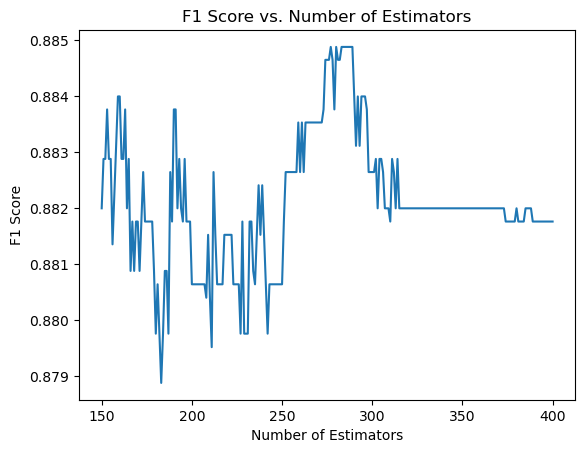

n_estimators for max f1 = 277


In [38]:
plot_estimators_vs_accuracy(X_train, y_train, X_test, y_test, 150, 400)

The number of estimators that seem to be optimal for this model is 277. Lets build a model using this number and store it in the record data frame. 

In [39]:
""" Random Forest Model 4. """

model_rf4 = RandomForestClassifier(n_estimators=277,
                                  max_depth=10,
                                  random_state=42
                                  )
model_rf4.fit(X_train, y_train)

y_pred = model_rf4.predict(X_test) # Test Predictions
y_train_pred = model_rf4.predict(X_train) # Train Predictions

In [40]:
# displaying and storing metrics of model two
modelFourMetrics = modelMetrics("RandForest n_estimators Tuned", y_test, y_pred)
pd.DataFrame([modelOneMetrics, modelTwoMetrics, modelThreeMetrics,
             modelFourMetrics])

,Model Name,Test Accuracy,Recall,F1,Precision
0,RandForest 4 Features,0.906667,0.906667,0.875984,0.779335
1,RandForest 3 Features,0.907407,0.907407,0.876847,0.780702
2,RandForest 2 Features,0.860741,0.860741,0.822976,0.708266
3,RandForest n_estimators Tuned,0.914815,0.914815,0.884885,0.797834


In [41]:
print(f" Train Accuracy: {accuracy_score(y_train, y_train_pred): .04}")

 Train Accuracy:  0.9171


This is the best model so far. All metrics have gone up from tuning the number of estimators. There should be mention that the max_depth was also doubled from 5 to 10. Model 5 will focus on perfecting this parameter.

### Model 5

In [42]:
def plot_depth_vs_accuracy(X_train, y_train, X_test, y_test, start, end):
    """ n_estimator tuned for best F1 score. """
    depth = list()
    f1_scores = list()

    # Iterate over a range of n_estimators
    for n in range(start, end+1):
        # Train the model
        model = RandomForestClassifier(n_estimators=277, max_depth=n, random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate F1 score
        f1 = f1_score(y_test, y_pred)

        # Append results to lists
        depth.append(n)
        f1_scores.append(f1)
        
    # Find the max F1 score and its corresponding n_estimators
    max_f1 = max(f1_scores)
    max_f1_index = f1_scores.index(max_f1)
    max_depth = depth[max_f1_index]
    
    

    # Plot results
    plt.plot(depth, f1_scores)
    plt.xlabel("Max Depth of Tree's in Forest")
    plt.ylabel('F1 Score')
    plt.title('F1 Score vs. Max Depth')
    plt.show()

    print(f"max_depth for max f1 = {max_depth}")

# plot_estimators_vs_accuracy(X_train, y_train, X_test, y_test, 1, 200)

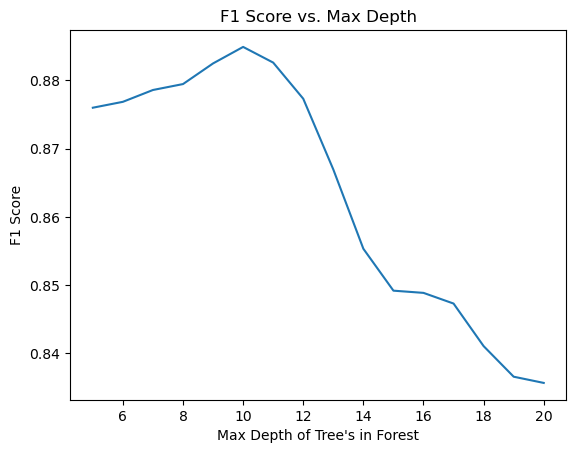

max_depth for max f1 = 10


In [43]:
plot_depth_vs_accuracy(X_train, y_train, X_test, y_test, 5, 20)

10 is the max depth that yeilds the highest f1 score. No changes needed. 

In [44]:
""" Random Forest Model 5. """

model_rf5 = RandomForestClassifier(n_estimators=277,
                                  max_depth=10,
                                  random_state=42,
                                  )
model_rf5.fit(X_train, y_train)

y_pred = model_rf5.predict(X_test) # Test Predictions
y_train_pred = model_rf5.predict(X_train) # Train Predictions

In [45]:
# displaying and storing metrics of model two
modelFiveMetrics = modelMetrics("RandForest max_depth Tuned", y_test, y_pred)
pd.DataFrame([modelOneMetrics, modelTwoMetrics, modelThreeMetrics,
             modelFourMetrics, modelFiveMetrics])

,Model Name,Test Accuracy,Recall,F1,Precision
0,RandForest 4 Features,0.906667,0.906667,0.875984,0.779335
1,RandForest 3 Features,0.907407,0.907407,0.876847,0.780702
2,RandForest 2 Features,0.860741,0.860741,0.822976,0.708266
3,RandForest n_estimators Tuned,0.914815,0.914815,0.884885,0.797834
4,RandForest max_depth Tuned,0.914815,0.914815,0.884885,0.797834


In [46]:
print(f" Train Accuracy: {accuracy_score(y_train, y_train_pred): .04}")

 Train Accuracy:  0.9171


Model 4 & 5 are the same. This is because the max_depth was set to 10 before finding out that this random setting was actually the best. These final 2 models are the best of the bunch. 

___

# Conclusions

In [47]:
df.columns.tolist()

['Word_Count',
 'Number_of_Sentence',
 'Unique_Words',
 'Average_Word_Length',
 'Label']

In [48]:
split(30)

'[At a 30% split] Train: 3150 | Test: 1350'

#### Table for Report

In [49]:
pd.DataFrame([modelOneMetrics, modelTwoMetrics, modelThreeMetrics,
             modelFourMetrics, modelFiveMetrics])


,Model Name,Test Accuracy,Recall,F1,Precision
0,RandForest 4 Features,0.906667,0.906667,0.875984,0.779335
1,RandForest 3 Features,0.907407,0.907407,0.876847,0.780702
2,RandForest 2 Features,0.860741,0.860741,0.822976,0.708266
3,RandForest n_estimators Tuned,0.914815,0.914815,0.884885,0.797834
4,RandForest max_depth Tuned,0.914815,0.914815,0.884885,0.797834


## Final Report

A dataset with the 4 features, “Word_Count,” “Number_of_Sentence,” “Unique_Words,” and “Average_Word_Length,” were used in Random Forest models to predict if a news story was fake (1) or not fake (0). There was not much revelation in the exploratory data analysis (EDA) except for the fact that some “news sources” had multiple records. This column “ID” was dropped as it was assumed to be of little predictive value. The records were all unique, so the conclusion of no repeat stories was agreed upon. 
Before the models were built, all the records in the data set (4,500) were partitioned into a training and testing partition. The split was 70% into the training (3,150) and 30% into the testing (1,350). Since the labels were imbalanced (3,017 [0] & 1,483 [1]) in the partitioning, the “stratify” parameter was set to True to offset the imbalance. 

Keeping in mind that all the models used the ensemble technique Random Forest Classifier, the metrics used to evaluate their success and compare between the two were: Accuracy, Recall, F1, and Precision. In the Table for Report, all models and said metrics are listed. What isn’t listed in the table is the accuracy of the model in the training data. If one looks back at the code, a comparison and execution of this was indeed done to determine if the model was over or under fit. All models did not have significant over or under fitting (+- 2% difference between train and test accuracy). 

Getting into the first model that was built “RandForest 4 Features,” all four features were used [hence the name]. The model’s Accuracy and Recall were the same at about 90.67%.  The Precision was about 77.93% and the F1, around 87.6%. An interpretation of these figures in context is done in the model building section of this document (see Model Building → Model 1). All parameters for the instantiation of the model were default except for “n_estimators” and “max_depth.” The “random_state” parameter was set to 42 but this remained constant throughout all models.

Using the first model as a basis for the rest of the case study, a graph of the feature importance was assessed. The feature with the most importance in the model was “Unique_Words” and the feature with the lowest importance was “Average_Word_Length.” Model 2 was built with the same parameters as model one. The difference was the exclusion of “Average_Word_Length.” This model did a hair better or had one more true positive than model one when tested on the test data (see confusion matrix in Model Building → Model 2). Although the improvement was small, it was still an improvement, so this is the max number of features that were to be used going into model 3, 4, and 5. 

When building model 3, a dropping of the feature with the least most importance based on the feature importance graph in model 1 was executed (the feature was “Word_Count”). Doing so made all metrics plummet. The biggest difference was a drop in the precision of almost 7%. This means that the model became worse at predicting a true fake news story.

Learning from the model 3 blunder, the 3 features from model 2 were decided to be the best option moving forward. Model 4 investigated the fine tunning of the parameter “n_estimators.” This parameter is “the number of decision trees in the forest” (sk-learn developers, 2024). The default value is 100 trees and an investigation of the model with 150 to 400 trees was done. From the graph, it seemed best that a model had the highest F1 score when the number of trees was 277. It is important to mention that the parameter “max_depth,” was also increased to 10 instead of 5 (it was set to 5 for all previous models). 

Model 5 was an attempt to perfect the parameter, “max_depth.” Like the investigation completed in model 4, the same graphing technique was performed but with a swap of parameters. This swap was for the “max_depth” parameter and is defined as “the maximum depth of a decision tree” (sk-learn developers, 2024). Surprisingly, the F1 score was the highest when the depth of each tree in the forest was 10. This means that this model needed to change nothing, but the work was not done in vain. This is because the proof for the “guestimation” as being spot on was the outcome. 

In conclusion, models 4 and 5 were the best in all metrics. These models were identical Random Forest Models that used 70% of the training partition and scored high in all measures. When comparing the test and train accuracy, the train was less than a percent higher than the test. The hyperparameters were tuned and validated via line graphs and the outcome was a maximum depth of each tree in the forest to 10 and the number of trees in the forest to 277. From the original dataset, “ID,” and “Average_Word_Length” were filtered out. 

Source Used: 
https://scikitlearn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
